In [1]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt
%matplotlib inline
colors = ['lightblue', 'pink']

<h2>Get male-female doctors, patients, discordance, and cumulative rating. </h2>

In [2]:
df_phase1  = pd.read_csv('phase1_lect_ata_new_df.csv')
df_phase2  = pd.read_csv('phase2_lect_ata_new_df.csv')
df_sent  = pd.read_csv('all_w_sent.csv',encoding = "ISO-8859-1")
df_liwc  = pd.read_csv('all_w_liwc.csv',encoding = "ISO-8859-1")
feature_keys = ['total words','total uniq', 'total wpt','D uniq','D words',\
                'D wpt','D pos_avg','P uniq','P words','P wpt','P pos_avg']
liwc_features = ['Achievement','Affective','Anger','Anxiety','Biological','Body','Causation','Certainty','Cognitive',\
                 'Discrepancy','Family','Feeling','Fillers','Friends','Future tense','Health','Hearing','Home',\
                 'Humans','Insight','Leisure','Money','Negative Emotion','Positive emotion','Religion','Sadness',\
                 'Sexual','Social','Swear','Time','death@Death']

def get_male_female_files(p_male,d_male):
	phase1_files = df_phase1[(df_phase1['isPatientMale']==p_male)&(df_phase1['isDoctorMale']==d_male)]['Filename'].tolist()
	phase2_files = df_phase2[(df_phase2['isPatientMale']==p_male)&(df_phase2['isDoctorMale']==d_male)]['Filename'].tolist()
	return phase1_files+phase2_files

male_doctor_file_names = get_male_female_files(0,1)+ get_male_female_files(1,1)
female_doctor_file_names = get_male_female_files(0,0)+ get_male_female_files(1,0)
male_patient_file_names = get_male_female_files(1,0)+ get_male_female_files(1,1)
female_patient_file_names = get_male_female_files(0,0)+ get_male_female_files(0,1)

maleD_femaleP_file_names = get_male_female_files(0,1)
maleD_maleP_file_names = get_male_female_files(1,1)
femaleD_femaleP_file_names = get_male_female_files(0,0)
femaleD_maleP_file_names = get_male_female_files(1,0)

print('Male Doctor conversation N = ',len(male_doctor_file_names))
print('Female Doctor conversation N = ',len(female_doctor_file_names))
print('Male Patients conversation N = ',len(male_patient_file_names))
print('Female Patients N = ',len(female_patient_file_names))
print('Male Doctor Female Patient N = ',len(maleD_femaleP_file_names))
print('Male Doctor Male Patient N = ',len(maleD_maleP_file_names))
print('Female Doctor Female Patient N = ',len(femaleD_femaleP_file_names))
print('Female Doctor Male Patient N = ',len(femaleD_maleP_file_names))

df = pd.concat([df_phase1,df_phase2])
docgender = df.groupby('p0_physician_id').mean()['isDoctorMale']
print('unique male doctors N = ',docgender.sum())
discordance_dict = dict()
discordance = pd.concat([df_phase1[['Filename','discDmind3']].dropna(),df_phase2[['Filename','discDmind3']].dropna()])
discordance_dict = discordance.set_index('Filename').T.to_dict('list')

rating_dict = dict()
rating = pd.concat([df_phase1[['Filename','cumulative rating']].dropna(),df_phase2[['Filename','cumulative rating']].dropna()])
rating_dict = rating.set_index('Filename').T.to_dict('list')

discordance[discordance['Filename'].isin(male_doctor_file_names)]['discDmind3'].mean()

Male Doctor conversation N =  255
Female Doctor conversation N =  127
Male Patients conversation N =  172
Female Patients N =  210
Male Doctor Female Patient N =  122
Male Doctor Male Patient N =  133
Female Doctor Female Patient N =  88
Female Doctor Male Patient N =  39
unique male doctors N =  25.0


2.7848101265822787

<h1>Is there any difference in male and female doctors' discordance and cumulative rating?</h1>

<h2>Differnce between male-female doctor's discordance</h2>

237 114 255 127


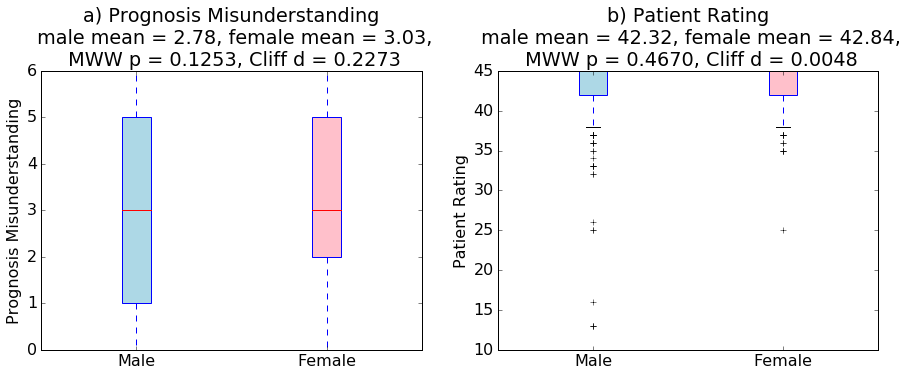

In [15]:
plt.rcParams.update({'font.size': 16})
maleD_discordance = df[df['Filename'].isin(male_doctor_file_names)]['discDmind3'].dropna()
femaleD_discordance = df[df['Filename'].isin(female_doctor_file_names)]['discDmind3'].dropna()
U, p = mannwhitneyu(maleD_discordance,femaleD_discordance)
print (len(maleD_discordance),len(femaleD_discordance),len(male_doctor_file_names),len(female_doctor_file_names))
d = (2*U)/(len(male_doctor_file_names)*len(female_doctor_file_names))-1 

plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
box = plt.boxplot([maleD_discordance,femaleD_discordance], patch_artist=True)
plt.title('a) Prognosis Misunderstanding\n male mean = %0.2f, female mean = %0.2f,\n MWW p = %0.4f, Cliff d = %0.4f' \
          % (maleD_discordance.mean(), femaleD_discordance.mean(),p,abs(d)))
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.xticks([1,2],['Male','Female'])
plt.ylabel('Prognosis Misunderstanding')

maleD_rating = df[df['Filename'].isin(male_doctor_file_names)]['cumulative rating'].dropna()
femaleD_rating = df[df['Filename'].isin(female_doctor_file_names)]['cumulative rating'].dropna()
U, p = mannwhitneyu(maleD_rating,femaleD_rating)
d = 2*U/(len(male_doctor_file_names)*len(female_doctor_file_names)) -1
plt.subplot(1,2,2)
box = plt.boxplot([maleD_rating,femaleD_rating],notch=False, patch_artist=True)
plt.title('b) Patient Rating\n male mean = %0.2f, female mean = %0.2f,\n MWW p = %0.4f, Cliff d = %0.4f' \
          % (maleD_rating.mean(), femaleD_rating.mean(),p,abs(d)))
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.xticks([1,2],['Male','Female'])
plt.ylabel('Patient Rating')



plt.savefig("male_female_doctor_discordance_ratings.png",bbox_inches='tight')
plt.show()

plt.clf()

<h2>Differnce between male-female doctor's cumulative ratings</h2>

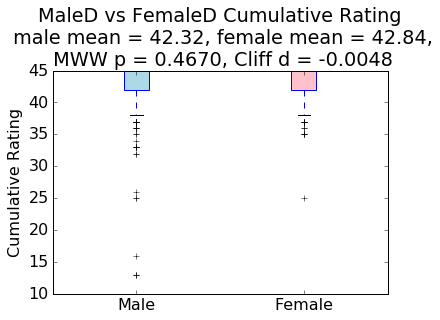

In [4]:
maleD_rating = df[df['Filename'].isin(male_doctor_file_names)]['cumulative rating'].dropna()
femaleD_rating = df[df['Filename'].isin(female_doctor_file_names)]['cumulative rating'].dropna()
U, p = mannwhitneyu(maleD_rating,femaleD_rating)
d = 2*U/(len(male_doctor_file_names)*len(female_doctor_file_names)) -1

box = plt.boxplot([maleD_rating,femaleD_rating],notch=False, patch_artist=True)
plt.title('MaleD vs FemaleD Cumulative Rating\n male mean = %0.2f, female mean = %0.2f,\n MWW p = %0.4f, Cliff d = %0.4f' \
          % (maleD_rating.mean(), femaleD_rating.mean(),p,d))
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.xticks([1,2],['Male','Female'])
plt.ylabel('Cumulative Rating')
plt.savefig("male_female_doctor_cumulative_rating.png",bbox_inches='tight')
plt.show()

plt.clf()

<h2>Differnce between male-female patient's discordance</h2>

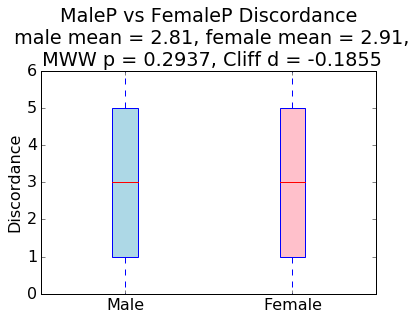

In [5]:
maleP_discordance = df[df['Filename'].isin(male_patient_file_names)]['discDmind3'].dropna()
femaleP_discordance = df[df['Filename'].isin(female_patient_file_names)]['discDmind3'].dropna()
U, p = mannwhitneyu(maleP_discordance,femaleP_discordance)
d = 2*U/(len(male_patient_file_names)*len(female_patient_file_names)) -1

box = plt.boxplot([maleP_discordance,femaleP_discordance], patch_artist=True)
plt.title('MaleP vs FemaleP Discordance\n male mean = %0.2f, female mean = %0.2f,\n MWW p = %0.4f, Cliff d = %0.4f' \
          % (maleP_discordance.mean(), femaleP_discordance.mean(),p,d))
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.xticks([1,2],['Male','Female'])
plt.ylabel('Discordance')
plt.savefig("male_female_patient_discordance.png")
plt.show()

plt.clf()

<h2>Differnce between male-female patient's cumulative ratings</h2>

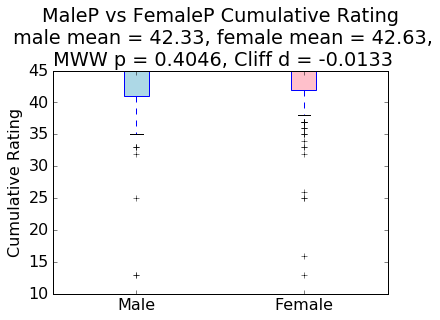

In [6]:
maleP_rating = df[df['Filename'].isin(male_patient_file_names)]['cumulative rating'].dropna()
femaleP_rating = df[df['Filename'].isin(female_patient_file_names)]['cumulative rating'].dropna()
U, p = mannwhitneyu(maleP_rating,femaleP_rating)
d = 2*U/(len(male_patient_file_names)*len(female_patient_file_names)) -1

box = plt.boxplot([maleP_rating,femaleP_rating], patch_artist=True)
plt.title('MaleP vs FemaleP Cumulative Rating\n male mean = %0.2f, female mean = %0.2f,\n MWW p = %0.4f, Cliff d = %0.4f' \
          % (maleP_rating.mean(), femaleP_rating.mean(),p,d))
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.xticks([1,2],['Male','Female'])
plt.ylabel('Cumulative Rating')
plt.savefig("male_female_patient_rating.png")
plt.show()

plt.clf()

<h2>Differnce between male-female patients with male-female doctor pairs discordance</h2>

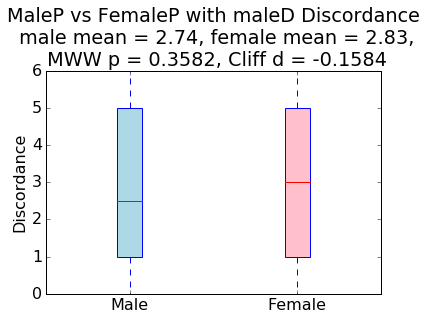

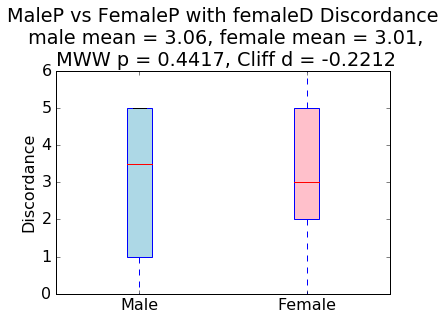

In [7]:
maleP_maleD_discordance = df[df['Filename'].isin(maleD_maleP_file_names)]['discDmind3'].dropna()
femaleP_maleD_discordance = df[df['Filename'].isin(maleD_femaleP_file_names)]['discDmind3'].dropna()
U, p = mannwhitneyu(maleP_maleD_discordance,femaleP_maleD_discordance)
d = 2*U/(len(maleD_maleP_file_names)*len(maleD_femaleP_file_names)) -1
#plt.subplot(2,1,1)
box = plt.boxplot([maleP_maleD_discordance,femaleP_maleD_discordance], patch_artist=True)
plt.title('MaleP vs FemaleP with maleD Discordance\n male mean = %0.2f, female mean = %0.2f,\n MWW p = %0.4f, Cliff d = %0.4f' \
          % (maleP_maleD_discordance.mean(), femaleP_maleD_discordance.mean(),p,d))
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.xticks([1,2],['Male','Female'])
plt.ylabel('Discordance')
plt.show()
plt.savefig("male_female_patient_with_male_doctor_discordance.png")
plt.clf()


maleP_femaleD_discordance = df[df['Filename'].isin(femaleD_maleP_file_names)]['discDmind3'].dropna()
femaleP_femaleD_discordance = df[df['Filename'].isin(femaleD_femaleP_file_names)]['discDmind3'].dropna()
U, p = mannwhitneyu(maleP_femaleD_discordance,femaleP_femaleD_discordance)
d = 2*U/(len(femaleD_maleP_file_names)*len(femaleD_femaleP_file_names)) -1
#plt.subplot(2,1,2)
box = plt.boxplot([maleP_femaleD_discordance,femaleP_femaleD_discordance], patch_artist=True)
plt.title('MaleP vs FemaleP with femaleD Discordance\n male mean = %0.2f, female mean = %0.2f,\n MWW p = %0.4f, Cliff d = %0.4f' \
          % (maleP_femaleD_discordance.mean(), femaleP_femaleD_discordance.mean(),p,d))
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.xticks([1,2],['Male','Female'])
plt.ylabel('Discordance')
plt.savefig("male_female_patient_with_female_doctor_discordance.png")
plt.show()

plt.clf()


<h2>
Male Doctor Correlations
</h2>

In [8]:
from scipy.stats import pearsonr
feat = df[df['Filename'].isin(male_doctor_file_names)][feature_keys+['cumulative rating','discDmind3']].dropna()

    
corr = dict()
corr['Feature'] = []
corr['p'] = []
corr['r'] = []
for f in feature_keys+['cumulative rating']:
    corr['Feature'].append(f) 
    corr['r'].append(pearsonr(feat[f],feat['discDmind3'])[0])
    corr['p'].append(pearsonr(feat[f],feat['discDmind3'])[1])
corr = pd.DataFrame(corr)
corr.sort_values(['r'])

,Feature,p,r
7,P uniq,0.030719,-0.140398
9,P wpt,0.046698,-0.129342
8,P words,0.057909,-0.123365
11,cumulative rating,0.201968,-0.083179
6,D pos_avg,0.309729,-0.066260
1,total uniq,0.452994,-0.048976
0,total words,0.646984,-0.029899
2,total wpt,0.959596,-0.003308
4,D words,0.813584,0.015398
3,D uniq,0.734867,0.022112


In [9]:
feat = df_liwc.groupby('Filename').sum().reset_index()
col = feat.columns.tolist()
print(col)

feat = pd.merge(feat,df,how='inner',on = 'Filename')
feat = feat[feat['Filename'].isin(male_doctor_file_names)][liwc_features+['discDmind3']].dropna()


corr = dict()
corr['Feature'] = []
corr['p'] = []
corr['r'] = []
for f in liwc_features:
    corr['Feature'].append(f) 
    corr['r'].append(pearsonr(feat[f],feat['discDmind3'])[0])
    corr['p'].append(pearsonr(feat[f],feat['discDmind3'])[1])
corr = pd.DataFrame(corr)
corr.sort_values(['r'])

['Filename', 'Achievement', 'Adverbs', 'Affective', 'Anger', 'Anxiety', 'Articles', 'Assent', 'Auxiliary verbs', 'Biological', 'Body', 'Causation', 'Certainty', 'Cognitive', 'Common Verbs', 'Conjunctions', 'Discrepancy', 'Exclusion', 'Family', 'Feeling', 'Fillers', 'Friends', 'Function words', 'Future tense', 'Health', 'Hearing', 'Home', 'Humans', 'I', 'Impersonal pronouns', 'Inclusion', 'Ingestion', 'Inhibition', 'Insight', 'Leisure', 'Money', 'Motion', 'NOT IN DICT', 'Negations', 'Negative Emotion', 'Non-fluencies', 'Numbers', 'Past tense', 'Perceptual', 'Personal pronouns', 'Positive emotion', 'Prepositions', 'Present tense', 'Quantifiers', 'Relativity', 'Religion', 'Sadness', 'Seeing', 'Sexual', 'SheHe', 'Social', 'Space', 'Swear', 'Tentativeness', 'They', 'Time', 'Total pronouns', 'We', 'Work', 'You', 'death@Death', 'n_words']


,Feature,p,r
20,Leisure,0.050871,-0.126990
25,Sadness,0.213236,-0.081149
28,Swear,0.226991,-0.078772
26,Sexual,0.398928,-0.055043
2,Anger,0.409758,-0.053791
29,Time,0.450748,-0.049219
0,Achievement,0.560506,-0.037998
19,Insight,0.610657,-0.033238
12,Fillers,0.670059,-0.027818
22,Negative Emotion,0.699419,-0.025209


<h2>
Female Doctor Correlations
</h2>

In [10]:
from scipy.stats import pearsonr
feat = df[df['Filename'].isin(female_doctor_file_names)][feature_keys+['cumulative rating','discDmind3']].dropna()
corr = dict()
corr['Feature'] = []
corr['p'] = []
corr['r'] = []
for f in feature_keys+['cumulative rating']:
    corr['Feature'].append(f) 
    corr['r'].append(pearsonr(feat[f],feat['discDmind3'])[0])
    corr['p'].append(pearsonr(feat[f],feat['discDmind3'])[1])
corr = pd.DataFrame(corr)
corr.sort_values(['r'])


,Feature,p,r
6,D pos_avg,0.008753,-0.244488
10,P pos_avg,0.239036,-0.111156
7,P uniq,0.609846,-0.048298
8,P words,0.670561,-0.040268
1,total uniq,0.891332,-0.012938
11,cumulative rating,0.995380,-0.000548
0,total words,0.900970,0.011784
3,D uniq,0.763720,0.028462
4,D words,0.696902,0.036875
9,P wpt,0.434967,0.073835


In [11]:
feat = df_liwc.groupby('Filename').mean().reset_index()
feat = pd.merge(feat,df,how='inner',on = 'Filename')
feat = feat[feat['Filename'].isin(female_doctor_file_names)][liwc_features+['discDmind3']].dropna()
corr = dict()
corr['Feature'] = []
corr['p'] = []
corr['r'] = []
for f in liwc_features:
    corr['Feature'].append(f) 
    corr['r'].append(pearsonr(feat[f],feat['discDmind3'])[0])
    corr['p'].append(pearsonr(feat[f],feat['discDmind3'])[1])
corr = pd.DataFrame(corr)
corr.sort_values(['r'])

,Feature,p,r
20,Leisure,0.578542,-0.052572
24,Religion,0.770555,-0.027615
14,Future tense,0.826011,-0.020815
30,death@Death,0.855619,-0.017230
18,Humans,0.913693,-0.010264
4,Biological,0.963553,-0.004327
21,Money,0.999037,0.000114
15,Health,0.844675,0.018552
12,Fillers,0.837044,0.019476
23,Positive emotion,0.820406,0.021497
